## 1. Dice rolls (*)
Create a textfile called **dice_rolls.txt** using Python. Also for each subtask, write adequate headers. 

&nbsp; a) &nbsp; Simulate 20 dice rolls and write them to your textfile. (*)

&nbsp; b) &nbsp; Sort the dice rolls from a) and write them to a separate row in the same textfile. (*)

&nbsp; c) &nbsp; Count the number of fours in the dice rolls and write them to a separate row in the same textfile. (*)

In [26]:
import random as rnd

file_path = "assets/dice_rolls.txt"

with open(file_path, "a") as dice_rolls_file:

    # a)
    # simulate 20 dice rolls:
    dice_rolls = [rnd.randint(1, 6) for _ in range(20)]

    # write each roll to file:
    for roll in range(20):
        dice_rolls_file.write(f"{dice_rolls[roll]}") # write roll to file
        if roll < 19: # for all except last roll:
            dice_rolls_file.write(", ") # add comma and space for better formatting
    dice_rolls_file.write("\n\n") # newlines for formatting

    # b)
    # sort rolls
    dice_rolls.sort()

    # write each roll to file:
    for roll in range(20):
        dice_rolls_file.write(f"{dice_rolls[roll]}") # write roll to file
        if roll < 19: # for all except last roll:
            dice_rolls_file.write(", ") # add comma and space for better formatting
    dice_rolls_file.write("\n\n") # newlines for formatting


    # c)
    # count number of fours:
    dice_rolls_fours = [4 for roll in dice_rolls if roll == 4]

    # write each roll to file:
    for roll in range(len(dice_rolls_fours)):
        dice_rolls_file.write(f"{dice_rolls_fours[roll]}") # write roll to file
        if roll < len(dice_rolls_fours) - 1: # for all except last roll:
            dice_rolls_file.write(", ") # add comma and space for better formatting

## 2. Test results (*)
Read in the file test_result.txt (located in the data folder of this repo) in Python.

[test_result]: https://github.com/kokchun/Programmering-med-Python-21/blob/main/Files/test_result.txt

&nbsp; a) &nbsp; Print out the text in the terminal (*)

&nbsp; b) &nbsp; Create new rows in the same file and write the people and their corresponding scores in alphabetical order. (*)

&nbsp; c) &nbsp; Create additional rows in the same file and sort the people after their grades. The grade limits are: (**)

- F < 20
- E: 20-29
- D: 30-39
- C: 40-49
- B: 50-59
- A: 60-70

In [32]:
# a)
file_path = "assets/test_results.txt"

with open(file_path, "r") as f_read:
    for row in f_read:
        row = row.strip("\n")
        print(row)

Adam Gustafsson 25
Emil Johansson 23
Sven Erik Karlsson 13
Ove Karlsten 41
Emma Boden 32
Ida HÃ¥kansson 23
Ella Ester 41
Hanna Karlsson 23 
Johan Johansson 42
Sven Erik Lundin 39
BjÃ¶rn BjÃ¶rnsson 39
Karl Karlsson 32
Bose Bosseson 32
HÃ¥kan HÃ¥kanson 24
Jonas Jonasson 31
Erik Eriksson 31
Gore Bord 55
Jakob Kallander 65
Fredrika Ulven 10


In [103]:
# b)
file_path = "assets/test_results.txt"

with open(file_path, "r") as f_read, open(file_path, "a") as f_append: # open file as read and append

    students = [student.strip() for student in f_read] # add all rows to students list, strip()-ing newlines

    students.sort() # sort in alphabetical order
    f_append.write("\n\n") # append 2 newlines after original text for better readability

    for student in students: # go through each student (in alphabetical order because of the earlier sort):
        f_append.write(f"{student}\n") # add student and newline to document
    
    # c)
    students_graded = [] # initialize empty list to store graded students

    def sort_by(student): # def function to custom sort students using sort() below
        return student[-2::] # sort student by the last 2 characters (their grade)

    students.sort(key = sort_by, reverse = True) # sort using custom function above (reverse to get highest grade first)

    for student in students: # go through all students (now sorted by grades):
        if int(student[-2::]) < 20: # if score is less than 20:
            student += " - F" # add F after their name and score
        elif int(student[-2::]) < 30: # repeat...
            student += " - E"
        elif int(student[-2::]) < 40:
            student += " - D"
        elif int(student[-2::]) < 50:
            student += " - C"
        elif int(student[-2::]) < 60:
            student += " - B"
        else:
            student += " - A"
        students_graded.append(student) # append graded student to students graded
        
    f_append.write("\n\n") # append 2 newlines after original text for better readability

    for student in students_graded: # go through each student (in grade order because of the earlier sort):
        f_append.write(f"{student}\n") # add student and newline to document

## 3. National test (*)  
Read in the file NPvt19Ma2A.txt and NPvt19Ma2C.txt (located in the data folder of this repo) in Python. Use matplotlib to plot pie charts for each grade categories in each file. (*)

NPvt19Ma2A grades: [0.0, 0.0, 2.4, 5.3, 37.3, 55.0]
NPvt19Ma2B grades: [0.3, 1.5, 10.7, 13.6, 31.0, 42.8]
NPvt19Ma2C grades: [8.4, 14.2, 26.9, 16.6, 21.3, 12.6]


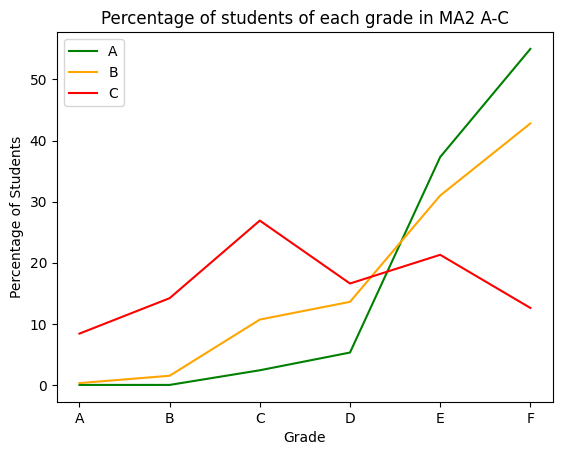

In [155]:
import matplotlib.pyplot as plt

# file path for the data sources:
file_path_a = "assets/NPvt19Ma2A.txt"
file_path_b = "assets/NPvt19Ma2B.txt"
file_path_c = "assets/NPvt19Ma2C.txt"

# grades lists to store grades:
grades_a = []
grades_b = []
grades_c = []

# grades list of available grades:
grades_list = ["A", "B", "C", "D", "E", "F"]

# list of characters to clean from data sources (to only have numbers remaining):
characters_to_clean = "ABCDEF %\n"


with open(file_path_a, "r") as file_a: # open file:
    for row in file_a:
        for character in characters_to_clean:
            row = row.replace(character, "") # replace all characters from characters_to_clean list with nothing
        grades_a.append(float(row)) # append clean number, converted to float, to grades list

with open(file_path_b, "r") as file_b: # open file:
    for row in file_b:
        for character in characters_to_clean:
            row = row.replace(character, "") # replace all characters from characters_to_clean list with nothing
        grades_b.append(float(row)) # append clean number, converted to float, to grades list

with open(file_path_c, "r") as file_c: # open file:
    for row in file_c:
        for character in characters_to_clean:
            row = row.replace(character, "") # replace all characters from characters_to_clean list with nothing
        grades_c.append(float(row)) # append clean number, converted to float, to grades list

# print grades lists:
print(f"NPvt19Ma2A grades: {grades_a}")
print(f"NPvt19Ma2B grades: {grades_b}")
print(f"NPvt19Ma2C grades: {grades_c}")

# plot grades lists:
plt.plot(grades_list, grades_a, label = "A", color = 'green')
plt.plot(grades_list, grades_b, label = "B", color = 'orange')
plt.plot(grades_list, grades_c, label = "C", color = 'red')

plt.legend() # show labels

plt.title("Percentage of students of each grade in MA2 A-C")# name title of graph
plt.xlabel("Grade") # name x-axis
plt.ylabel("Percentage of Students"); # name y-axis

##  4. Dice roll experiment (**)  
Simulate 10, 100, 1000, 10000, 100000 dice rolls and count the freqencies and probabilities for each number in each simulation.  
Create a new text file using Python with the name "simulation.txt" and write the results to that text file.(**)

In [176]:
import random as rnd

file_path = "assets/simulation.txt"

with open(file_path, "w") as file_w:

    rolls = 10 # amount of rolls for first set of simulation

    for i in range(5): # 5 sets of simulations

        dice_roll_list  = [0, 0, 0, 0, 0, 0] # roll counter list
        probabilities   = [0, 0, 0, 0, 0, 0] # roll odds list

        for roll in range(rolls): # roll (rolls) amount of dice, add them to dice roll list:
            dice_roll = rnd.randint(1, 6)
            dice_roll_list[dice_roll - 1] += 1

        for element in range(6): # calculate probability of each roll by dividing amount of rolls by total rolls:
            probabilities[element] = dice_roll_list[element] / rolls

        # write to file:
        file_w.write(f"{rolls} Rolls\nroll, outcome, probability\n") # write amount of rolls done, and column headers
        for i in range(6): # for each roll 1-6:
            file_w.write(f"{i + 1}, {dice_roll_list[i]}, {probabilities[i]}\n") # write roll outcome and probability, followed by newline
        file_w.write("\n\n") # write empty newlines between each set of simulations

        rolls *= 10 # increment rolls by *10 for next set of simulations